In [2]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

## Вплив множника 

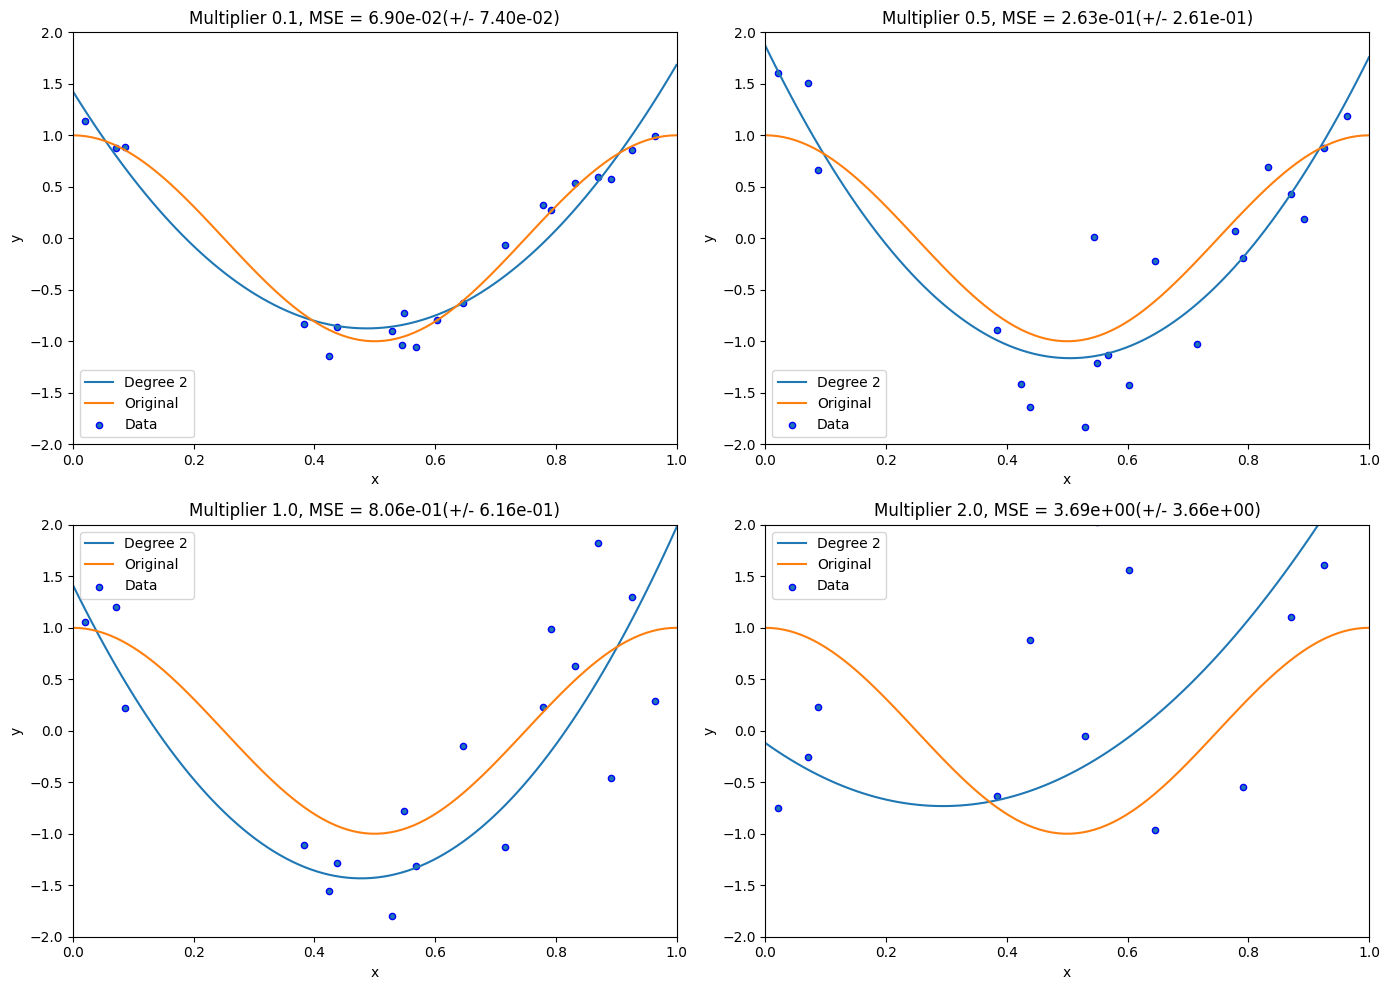

In [6]:
def func(x):
    return np.cos(2 * np.pi * x)

np.random.seed(0)

n_samples = 20

X = np.sort(np.random.rand(n_samples))
# Змінюємо множник випадкового доданку
random_multipliers = [0.1, 0.5, 1.0, 2.0]
degree = 2

plt.figure(figsize=(14, 10))

for j, multiplier in enumerate(random_multipliers):
    plt.subplot(2, 2, j+1)
    
    polynomial_features = PolynomialFeatures(degree=degree, include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([
        ("polynomial", polynomial_features),
        ("linear", linear_regression),
    ])
    # Застосовуємо множник випадкового доданку до y
    y = func(X) + np.random.randn(n_samples) * multiplier

    pipeline.fit(X[:, np.newaxis], y)
    scores = cross_val_score(pipeline, X[:, np.newaxis], y, scoring="neg_mean_squared_error", cv=10)

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label=f'Degree {degree}')
    plt.plot(X_test, func(X_test), label="Original")
    plt.scatter(X, y, edgecolor="b", s=20, label="Data")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title(f"Multiplier {multiplier}, MSE = {-scores.mean():.2e}(+/- {scores.std():.2e})")

plt.tight_layout()
plt.show()

## Вплив різних степеней поліномів

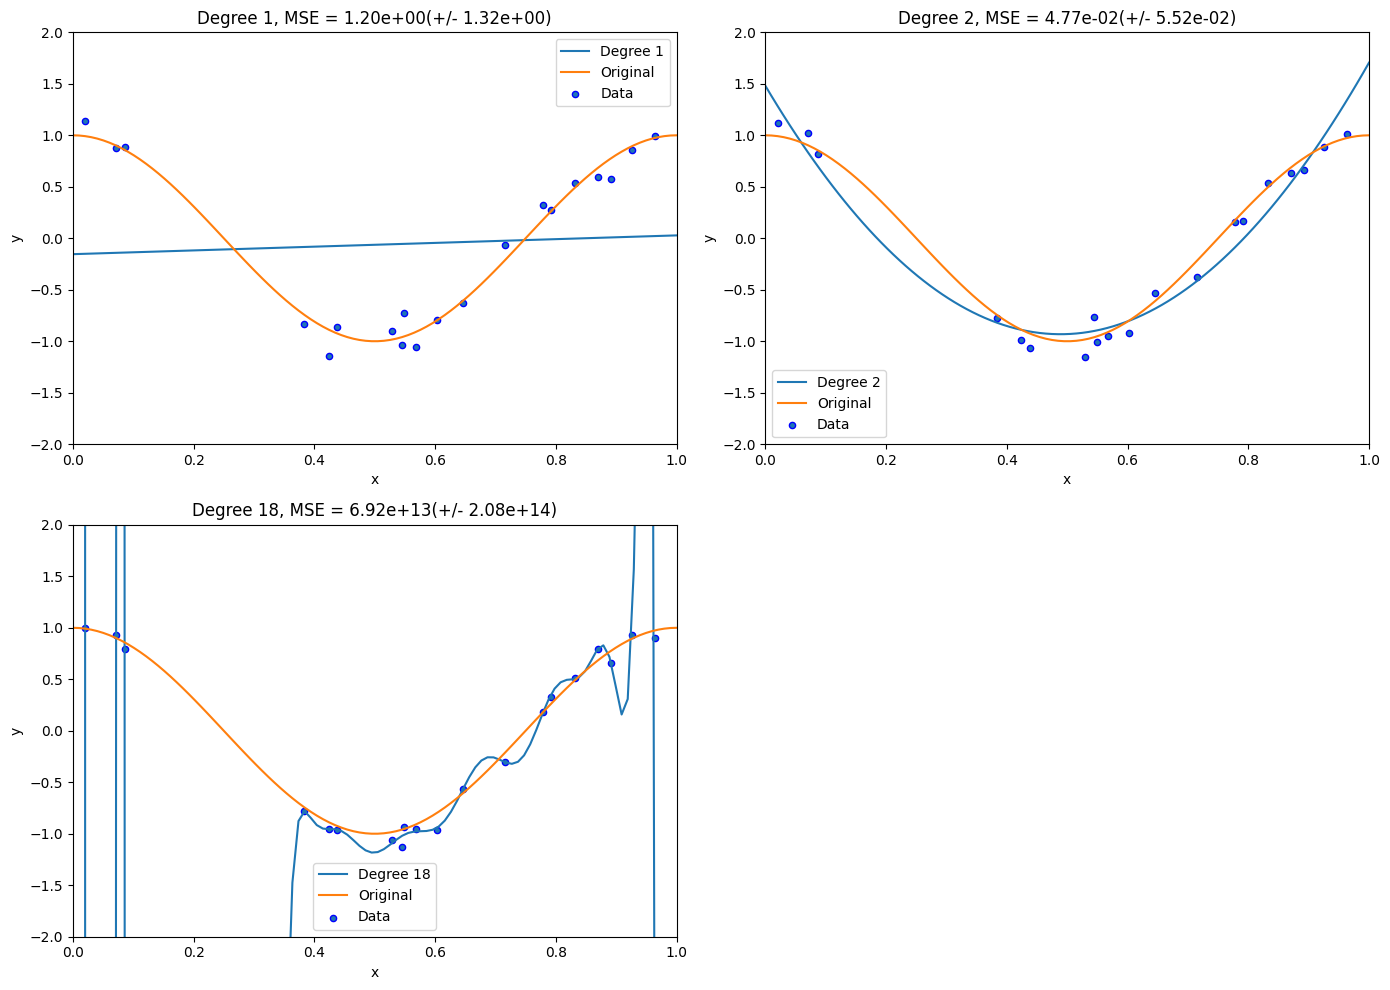

In [7]:
def func(x):
    return np.cos(2 * np.pi * x)

np.random.seed(0)

n_samples = 20

X = np.sort(np.random.rand(n_samples))
degree = [1, 2, 18]
multiplier = 0.1

plt.figure(figsize=(14, 10))

for i, deg in enumerate(degree):
    plt.subplot(2, 2, i+1)
    
    polynomial_features = PolynomialFeatures(degree=deg, include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([
        ("polynomial", polynomial_features),
        ("linear", linear_regression),
    ])
    # Застосовуємо множник випадкового доданку до y
    y = func(X) + np.random.randn(n_samples) * multiplier

    pipeline.fit(X[:, np.newaxis], y)
    scores = cross_val_score(pipeline, X[:, np.newaxis], y, scoring="neg_mean_squared_error", cv=10)

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label=f'Degree {deg}')
    plt.plot(X_test, func(X_test), label="Original")
    plt.scatter(X, y, edgecolor="b", s=20, label="Data")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title(f"Degree {deg}, MSE = {-scores.mean():.2e}(+/- {scores.std():.2e})")

plt.tight_layout()
plt.show()